# IMPORTATION

In [1]:
import csv
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport #https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
#import qgrid

import pingouin as pg
import scipy

import ast #Tranfromer un dictioner
import time

/home/chispitas/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from math import pi

import joblib
from scipy.stats import randint
import shap #https://shap.readthedocs.io/en/latest/index.html

2021-12-06 17:50:30.779249: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-06 17:50:30.779285: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder # Low dimention

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

from yellowbrick.cluster import KElbowVisualizer #https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
from yellowbrick.cluster import silhouette_visualizer #pip install yellowbrick
from yellowbrick.datasets import load_nfl

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [6]:
#from pca import pca #pip install pca https://github.com/erdogant/pca
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
direc0 = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P5-Segmentez des clients dun site e-commerce/Git/DATA/'

str_dfML = direc0 + 'dfML.csv'

In [8]:
dfML = pd.read_csv(str_dfML, encoding='utf-8', index_col=0) #, delimiter='\t', lineterminator="\n", doublequote=False, 
dfML = dfML.convert_dtypes()

dfML.dtypes

customer_state_last                string
estimated_delivered_time_mean       Int64
freight_value_sum                 Float64
item_number_cat                     Int64
o_purchase_time_H_cat              string
order_purchase_timestamp_W_cat     string
order_purchase_timestamp_last       Int64
population_cat                     string
population_st                       Int64
price_and_freight_sum_cat           Int64
price_mean                        Float64
price_sum                         Float64
price_sum_z-score                 Float64
product_category_name              string
product_name_lenght_cat_mean        Int64
product_photos_qty_cat              Int64
review_score_mean                   Int64
dtype: object

## Missing values

In [9]:
dfML

,customer_state_last,estimated_delivered_time_mean,freight_value_sum,item_number_cat,o_purchase_time_H_cat,order_purchase_timestamp_W_cat,order_purchase_timestamp_last,population_cat,population_st,price_and_freight_sum_cat,price_mean,price_sum,price_sum_z-score,product_category_name,product_name_lenght_cat_mean,product_photos_qty_cat,review_score_mean
customer_unique_id,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,sp,10,12.0,1,7-12,Week,111,Rural,33599,2,129.9,129.9,0.913424,{'bed_bath_table'},4,1,5
0000b849f77a49e4a4ce2b2a4ca5be3f,sp,7,8.29,2,7-12,Week,114,Rural,33599,1,18.9,18.9,-1.101578,{'health_beauty'},3,1,4
0000f46a3911fa3c0805444483337064,sc,27,17.22,2,18-23,Week,536,Rural,2724,1,69.0,69.0,-0.192104,{'stationery'},1,3,3
0000f6ccb0745a6a4b88665a16c9f078,pa,31,17.63,2,18-23,Week,320,Rural,379,1,25.99,25.99,-0.972872,{'telephony'},1,4,4
0004aac84e0df4da2b147fca70cf8255,sp,20,16.89,2,18-23,Week,287,Rural,33599,3,180.0,180.0,1.822897,{'telephony'},3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,rs,31,15.16,1,18-23,Weekend,254,Rural,4065,1,58.0,58.0,-0.391789,{'watches_gifts'},1,1,5
fffea47cd6d3cc0a88bd621562a9d061,ba,32,19.69,1,18-23,Weekend,261,Rural,2150,1,64.89,64.89,-0.266714,{'baby'},1,2,4
ffff371b4d645b6ecea244b27531430a,mt,44,22.56,1,14-18,Week,568,Rural,531,2,89.9,89.9,0.187297,{'auto'},3,4,5


In [10]:
def MissingValues(df):
    dfDESCRIPTION = df.describe(include='all')
    dfTAUX = dfDESCRIPTION.T
    LEN = len(df)
    dfTAUX['%full'] = (dfTAUX['count']/LEN)*100
    dfTAUX['%unique'] = (1-dfTAUX['unique']/dfTAUX['count'])*100
    dfTAUX.drop(['top'], axis=1,inplace = True)
    dfTAUX.sort_values('%full', ascending = True ,inplace = True)
    return dfTAUX

In [11]:
MissingValues(dfML)[['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].style.format('{0:,.1f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']) # ,cmap='Reds'https://matplotlib.org/stable/tutorials/colors/colormaps.html

,count,unique,freq,mean,std,min,max,%full,%unique
customer_state_last,"73,054.0",27.0,"33,599.0",nan,nan,nan,nan,100.0,100.0
product_name_lenght_cat_mean,"73,054.0",nan,nan,2.1,1.2,1.0,4.0,100.0,nan
product_category_name,"73,054.0",452.0,"7,635.0",nan,nan,nan,nan,100.0,99.4
price_sum_z-score,"73,054.0",nan,nan,-0.0,1.0,-1.4,13.1,100.0,nan
price_sum,"73,054.0",nan,nan,79.6,55.1,0.8,800.1,100.0,nan
price_mean,"73,054.0",nan,nan,77.3,51.8,0.8,239.9,100.0,nan
price_and_freight_sum_cat,"73,054.0",nan,nan,1.6,0.8,1.0,3.0,100.0,nan
product_photos_qty_cat,"73,054.0",nan,nan,2.0,1.2,1.0,4.0,100.0,nan
population_st,"73,054.0",nan,nan,"18,455.5","14,209.3",5.0,"33,599.0",100.0,nan
order_purchase_timestamp_last,"73,054.0",nan,nan,239.9,152.7,0.0,713.0,100.0,nan


## STYLE Graph

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #Montrer toutes les colonnes

import plotly.express as px #pip install -U kaleido
import plotly.graph_objects as go #pip install plotly
from plotly.subplots import make_subplots #https://plotly.com/python/

#using the style 
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 
plt.rcParams["figure.figsize"] = [10,8]

#Width
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

#Legend
plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'w'
plt.rcParams['legend.markerscale'] = 3

#Scatter marker
plt.rcParams['scatter.marker'] = '.'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

## Separation des variables

In [13]:
# Organisation des variables (NUM/STR,DISCRETES/CONTINUES)
def lVAR_classification(dfSET):
 
    lVAR_cible = [ ] #Variable CIBLES 

    lVAR_str = dfSET.select_dtypes(exclude=[np.number, 'datetime', 'timedelta']).columns.difference(
        lVAR_cible+['review_creation_date', 'order_estimated_delivery_date', 
                    'review_id', 'seller_id', 'customer_id', 'order_id', 'product_id'])  #Les variables str DISCRETES ET CONTINUES
    lVAR_num = dfSET.select_dtypes(include=[np.number], exclude=['datetime', 'timedelta']).columns.difference(
        lVAR_cible+['product_name_lenght_cat', 'Year','order_purchase_timestamp_H','order_purchase_timestamp_W',
                    'order_delivered_customer_date_H',  'order_delivered_customer_date_M', 'order_delivered_customer_date_W',
                    'real_estimated_delivered_time', 'geo_code', 'geolocation_lat', 'geolocation_lng', 'order_item_id',
                    ])  #Les variables floats DISCRETES ET CONTINUES

    lVAR_str_cat = dfSET[lVAR_str].nunique().sort_values()[(dfSET.nunique()<1000)].index.difference([ ]) #Les variables str DISCRETES
    lVAR_str_cont  = lVAR_str.difference(lVAR_str_cat) #Les variables floats CONTINUES

    lVAR_num_cat = dfSET[lVAR_num].nunique().sort_values()[(dfSET.nunique()<1000)].index.difference(
        ['product_height_cm', 'product_length_cm', 'product_width_cm','item_number', 'population'
        ,'estimated_delivered_time_mean', 'order_purchase_timestamp_last', 'population_st',
        'N_Customer', 'freight_value_sum', 'price_mean','price_sum']) #Les variables floats DISCRETES
    lVAR_num_cont = lVAR_num.difference(lVAR_num_cat) #Les variables floats CONTINUES

    lVAR_cat = np.concatenate((lVAR_str_cat, lVAR_num_cat), axis=None)
    lVAR_cont = np.concatenate((lVAR_str_cont, lVAR_num_cont), axis=None)
      
    OUT = ['lVAR_cible', 'lVAR_str', 'lVAR_num', 'lVAR_cat', 'lVAR_cont', 'lVAR_str_cat', 'lVAR_str_cont', 'lVAR_num_cat', 'lVAR_num_cont']
    
    print('lVAR_cible',lVAR_cible)
    print('.......')
    print('lVAR_str_cat ',lVAR_str_cat)
    print('lVAR_str_cont ',lVAR_str_cont)
    print('.......')
    print('lVAR_num_cat ',lVAR_num_cat)
    print('lVAR_num_cont ',lVAR_num_cont)
    print('.......')
    print('lVAR_cat ',lVAR_cat)
    print('lVAR_cont ',lVAR_cont)
    
    return lVAR_cible, lVAR_str, lVAR_num, lVAR_cat, lVAR_cont, lVAR_str_cat, lVAR_str_cont, lVAR_num_cat, lVAR_num_cont

In [14]:
OUT = ['lVAR_cible', 'lVAR_str', 'lVAR_num', 'lVAR_cat', 'lVAR_cont', 'lVAR_str_cat', 'lVAR_str_cont', 'lVAR_num_cat', 'lVAR_num_cont']

In [15]:
lVAR_cible, lVAR_str, lVAR_num, lVAR_cat, lVAR_cont, lVAR_str_cat, lVAR_str_cont, lVAR_num_cat, lVAR_num_cont = lVAR_classification(
    dfML[dfML.columns.difference(['product_category_name'])])

lVAR_cible []
.......
lVAR_str_cat  Index(['order_purchase_timestamp_W_cat', 'population_cat',
       'o_purchase_time_H_cat', 'customer_state_last'],
      dtype='object')
lVAR_str_cont  Index([], dtype='object')
.......
lVAR_num_cat  Index(['item_number_cat', 'price_and_freight_sum_cat',
       'product_name_lenght_cat_mean', 'product_photos_qty_cat',
       'review_score_mean'],
      dtype='object')
lVAR_num_cont  Index(['estimated_delivered_time_mean', 'freight_value_sum',
       'order_purchase_timestamp_last', 'population_st', 'price_mean',
       'price_sum', 'price_sum_z-score'],
      dtype='object')
.......
lVAR_cat  ['order_purchase_timestamp_W_cat' 'population_cat' 'o_purchase_time_H_cat'
 'customer_state_last' 'item_number_cat' 'price_and_freight_sum_cat'
 'product_name_lenght_cat_mean' 'product_photos_qty_cat'
 'review_score_mean']
lVAR_cont  ['estimated_delivered_time_mean' 'freight_value_sum'
 'order_purchase_timestamp_last' 'population_st' 'price_mean' 'price_sum'
 'p

## Encoding categorical attribute

In [16]:
#DF Encoding
dfML_encoded = dfML.copy()
#dfML_encoded = dfML_encoded.drop(['customer_state_last', 'product_category_name', 'order_purchase_timestamp_last', 'population_cat', 'price_sum', 'product_name_lenght_cat_mean', 'estimated_delivered_time_mean', 'item_number_cat', 'price_and_freight_sum_cat', 'order_purchase_timestamp_H_cat'], axis=1)
dfML_encoded = dfML_encoded.drop(['price_and_freight_sum_cat', 'item_number_cat','population_cat','customer_state_last', 'product_category_name', 'order_purchase_timestamp_last', 'price_sum', 'product_name_lenght_cat_mean', 'estimated_delivered_time_mean', 'o_purchase_time_H_cat'], axis=1)
dfML_encoded.dtypes

freight_value_sum                 Float64
order_purchase_timestamp_W_cat     string
population_st                       Int64
price_mean                        Float64
price_sum_z-score                 Float64
product_photos_qty_cat              Int64
review_score_mean                   Int64
dtype: object

### OrdinalEncoder

In [17]:
lVAR_OrdinalEncoder = ['product_photos_qty_cat','review_score_mean'] 
for iVAR in lVAR_OrdinalEncoder:
    enc = OrdinalEncoder().fit(dfML[[iVAR]])
    dfML_encoded[iVAR] = enc.transform(dfML[[iVAR]])
    #Xtest_cat_encoded[iVAR] = enc.transform(Xtest_cat[[iVAR]])

dfML_encoded

,freight_value_sum,order_purchase_timestamp_W_cat,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,12.0,Week,33599,129.9,0.913424,0.0,4.0
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,Week,33599,18.9,-1.101578,0.0,3.0
0000f46a3911fa3c0805444483337064,17.22,Week,2724,69.0,-0.192104,2.0,2.0
0000f6ccb0745a6a4b88665a16c9f078,17.63,Week,379,25.99,-0.972872,3.0,3.0
0004aac84e0df4da2b147fca70cf8255,16.89,Week,33599,180.0,1.822897,2.0,4.0
...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,15.16,Weekend,4065,58.0,-0.391789,0.0,4.0
fffea47cd6d3cc0a88bd621562a9d061,19.69,Weekend,2150,64.89,-0.266714,1.0,3.0
ffff371b4d645b6ecea244b27531430a,22.56,Week,531,89.9,0.187297,3.0,4.0


### OneHotEncoder

In [18]:
lVAR_OneHotEncoder = ['order_purchase_timestamp_W_cat']
dfML[lVAR_OneHotEncoder].head(2)

,order_purchase_timestamp_W_cat
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,Week
0000b849f77a49e4a4ce2b2a4ca5be3f,Week


In [19]:
for iVAR in lVAR_OneHotEncoder:
    print(iVAR)
    enc = OneHotEncoder()
    X = enc.fit_transform(dfML[[iVAR]].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = enc.get_feature_names([iVAR]).tolist(), index = dfML.index)
    dfML_encoded = pd.concat([dfML_encoded, dfOneHot], axis=1)

    dfML_encoded = dfML_encoded.drop(iVAR, axis=1)

dfML_encoded = dfML_encoded.drop(['order_purchase_timestamp_W_cat_Weekend'], axis=1)
dfML_encoded

order_purchase_timestamp_W_cat


,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,12.0,33599,129.9,0.913424,0.0,4.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,33599,18.9,-1.101578,0.0,3.0,1.0
0000f46a3911fa3c0805444483337064,17.22,2724,69.0,-0.192104,2.0,2.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,17.63,379,25.99,-0.972872,3.0,3.0,1.0
0004aac84e0df4da2b147fca70cf8255,16.89,33599,180.0,1.822897,2.0,4.0,1.0
...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,15.16,4065,58.0,-0.391789,0.0,4.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,19.69,2150,64.89,-0.266714,1.0,3.0,0.0
ffff371b4d645b6ecea244b27531430a,22.56,531,89.9,0.187297,3.0,4.0,1.0


In [20]:
enc.categories_ # list of categoriesm

[array(['Week', 'Weekend'], dtype=object)]

### Scaling

In [21]:
dfML_S_E = dfML_encoded.copy()
#Xtest_S_E = pd.concat([Xtest_num, Xtest_cat_encoded], axis=1)

dfML_S_E

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,12.0,33599,129.9,0.913424,0.0,4.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,33599,18.9,-1.101578,0.0,3.0,1.0
0000f46a3911fa3c0805444483337064,17.22,2724,69.0,-0.192104,2.0,2.0,1.0
0000f6ccb0745a6a4b88665a16c9f078,17.63,379,25.99,-0.972872,3.0,3.0,1.0
0004aac84e0df4da2b147fca70cf8255,16.89,33599,180.0,1.822897,2.0,4.0,1.0
...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,15.16,4065,58.0,-0.391789,0.0,4.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,19.69,2150,64.89,-0.266714,1.0,3.0,0.0
ffff371b4d645b6ecea244b27531430a,22.56,531,89.9,0.187297,3.0,4.0,1.0


In [22]:
dfML_S_E = dfML_S_E.convert_dtypes()

In [23]:
dfML_S_E.dtypes

freight_value_sum                      Float64
population_st                            Int64
price_mean                             Float64
price_sum_z-score                      Float64
product_photos_qty_cat                   Int64
review_score_mean                        Int64
order_purchase_timestamp_W_cat_Week      Int64
dtype: object

In [24]:
from sklearn.preprocessing import MinMaxScaler 
for iVAR in dfML_S_E.columns.difference([]) :
    dfML_S_E[iVAR] = MinMaxScaler().fit_transform(dfML_encoded[[iVAR]])

dfML_S_E

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.078611,1.000000,0.539845,0.161454,0.000000,1.00,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.054307,1.000000,0.075507,0.022582,0.000000,0.75,1.0
0000f46a3911fa3c0805444483337064,0.112807,0.080937,0.285087,0.085262,0.666667,0.50,1.0
0000f6ccb0745a6a4b88665a16c9f078,0.115493,0.011133,0.105166,0.031453,1.000000,0.75,1.0
0004aac84e0df4da2b147fca70cf8255,0.110645,1.000000,0.749425,0.224134,0.666667,1.00,1.0
...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,0.099312,0.120855,0.239071,0.071500,0.000000,1.00,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.128988,0.063851,0.267894,0.080120,0.333333,0.75,0.0
ffff371b4d645b6ecea244b27531430a,0.147789,0.015658,0.372516,0.111410,1.000000,1.00,1.0


# PCA

In [25]:
def SolPCA(dfPCA, d, model, direc0):

    npPCA_reduced = model.fit_transform(dfPCA)
    
    #dfPCA_reduced
    lPC = ['PC1']
    for i in range(1, d):
        lPC = lPC + ['PC' + str(i+1)]
    dfPCA_reduced = pd.DataFrame([], columns = lPC)

    # Append the principle components for each entry to the dataframe
    for i in range(0, d):
        dfPCA_reduced['PC' + str(i + 1)] = npPCA_reduced[:, i]

    display(dfPCA_reduced.head())
    cumsum = np.cumsum(model.explained_variance_ratio_)
    
    # Do a scree plot
    ind = np.arange(0, d)
    (fig, ax) = plt.subplots(figsize=(8, 6))
    sns.pointplot(x=ind, y=cumsum)
    ax.set_title('Scree plot')
    ax.set_xticks(ind)
    ax.set_xticklabels(ind)
    ax.set_xlabel('Component Number')
    ax.set_ylabel('Cumulative Explained Variance')
    ax.set_ylim(0,1)
    plt.show()

    # Show the points in terms of the first two PCs
    g = sns.lmplot('PC1',
                   'PC2',
                   #hue='species',
                   data=dfPCA_reduced,
                   fit_reg=False,
                   scatter=True,
                   size=7,
                   markers='.'
                  )

    plt.show()
    fig.savefig(direc0 + '26-2PCs.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
    
    # Plot a variable factor map for the first two dimensions.
    (fig, ax) = plt.subplots(figsize=(8, 8))
    for i in range(0, model.components_.shape[1]):
        ax.arrow(0,
                 0,  # Start the arrow at the origin
                 model.components_[0, i],  #0 for PC1
                 model.components_[1, i],  #1 for PC2
                 head_width=0.02,
                 head_length=0.02,
                 fc='k', ec='k'
                )

        plt.text(model.components_[0, i] + 0.05,
                 model.components_[1, i] + 0.05,
                 dfPCA.columns[i]
                )

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    ax.set_title('Variable factor map')
    plt.show()
    fig.savefig(direc0 + '26-Correlation map.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
    
    # Dump components relations with features:
    resutl = pd.DataFrame(model.components_*100, columns=dfPCA.columns, index = lPC).T
    #display(resutl.head())
    display(resutl.sort_values(['PC1', 'PC2', 'PC3'], ascending=False).style.format('{0:,.0f}%').background_gradient())

In [26]:
from sklearn.preprocessing import StandardScaler
dfPCA = dfML_encoded.copy()
for iVAR in dfPCA.columns :
    scal = StandardScaler().fit(dfPCA[[iVAR]])
    dfPCA[iVAR] = scal.transform(dfPCA[[iVAR]])
dfPCA.head(3)

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.674225,1.065755,1.014207,0.913424,-0.856870,0.659361,0.550497
0000b849f77a49e4a4ce2b2a4ca5be3f,-1.338910,1.065755,-1.127455,-1.101578,-0.856870,-0.124269,0.550497
0000f46a3911fa3c0805444483337064,0.260994,-1.107140,-0.160813,-0.192104,0.852891,-0.907899,0.550497


## Cercle de correlation

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.767627,-1.844166,-0.583618,-0.349376,-0.682680,-0.080336
1,-2.140439,-0.940465,-0.960874,-0.154409,-0.207252,0.035695
2,0.063339,1.233248,0.011404,-0.595715,1.070996,-0.429454
3,-0.913461,1.712305,1.120578,-1.031481,0.857991,-0.266354
4,2.304940,-1.788346,0.716657,-0.798705,0.325713,0.319229


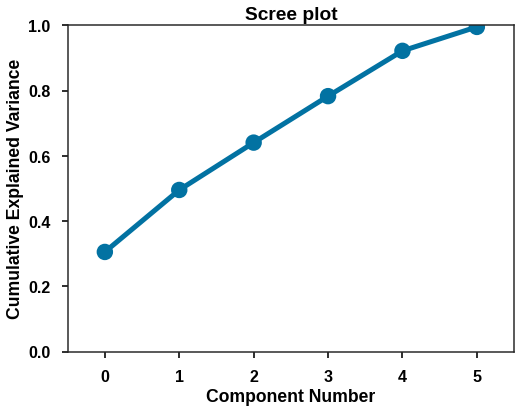

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
The `size` parameter has been renamed to `height`; please update your code.


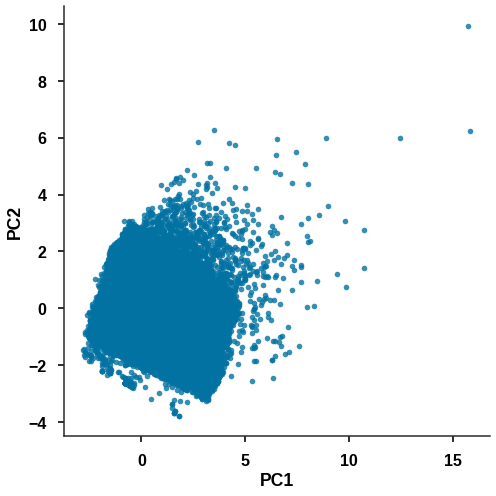

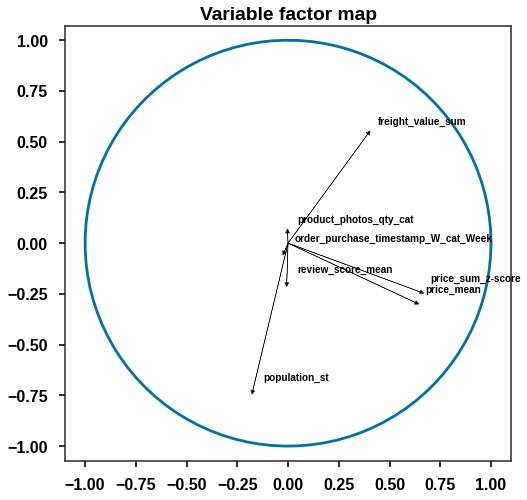

,PC1,PC2,PC3,PC4,PC5,PC6
price_sum_z-score,65%,-24%,-1%,1%,5%,-4%
price_mean,63%,-29%,-2%,0%,6%,-24%
freight_value_sum,39%,54%,4%,-3%,-12%,72%
product_photos_qty_cat,-0%,5%,76%,-25%,60%,2%
review_score_mean,-1%,-19%,54%,-25%,-78%,-3%
order_purchase_timestamp_W_cat_Week,-2%,-4%,-36%,-93%,6%,3%
population_st,-17%,-73%,-3%,8%,12%,65%


In [27]:
pca = PCA(svd_solver="full") #svd_solver="randomized", n_components=154
pca.fit(dfPCA)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
model = PCA(svd_solver="full", n_components=d) #svd_solver="randomized", n_components=154
SolPCA(dfPCA, d, model, direc0)

In [ ]:
model = PCA(svd_solver="full", n_components=4)
lColumns = dfML_S_E.columns
dfML_S_E = pd.DataFrame(model.fit_transform(dfPCA), index=dfML_S_E.index)
dfML_S_E.head(3)

#PCA INVERS!!!!!
dfPCA_invers = pd.DataFrame(model.inverse_transform(dfML_S_E), columns=lColumns, index=dfML_S_E.index)
from sklearn.preprocessing import StandardScaler
for iVAR in dfPCA_invers.columns :
    scal = StandardScaler().fit(dfML_encoded[[iVAR]])
    dfML_encoded[iVAR] = scal.inverse_transform(dfPCA_invers[[iVAR]])
dfML_encoded

In [ ]:
dfML_encoded.columns

# KMeans

## Inertia

In [ ]:
from sklearn.model_selection import train_test_split
dfML_S_E_train, dfML_S_E_test = train_test_split(dfML_S_E, test_size=0.999, random_state=42)
dfML_S_E_train.shape

t1 = time.time()

nc = 4
nf = 3

fig, axes = plt.subplots(nrows=nf, ncols=nc, figsize=(7*nc, 7*nf), sharex=False, sharey=True, gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
#fig.subplots_adjust(wspace=3, hspace=3) #interspace entre graphiques

k1=np.int64(np.geomspace(2, 20, num=8).round(0))
k2=np.int64(np.linspace(2, 20, 8).round(0)).tolist()

visualgrid = [KElbowVisualizer(KMeans("full"), init=10, random_state=1, k=k1, ax=axes[0][0]), 
              KElbowVisualizer(KMeans("k-means++"), init=10, random_state=1, k=k1, ax=axes[0][1]), 
              KElbowVisualizer(KMeans(algorithm="elkan"), init=10, random_state=1, k=k1, ax=axes[0][2]),
              KElbowVisualizer(MiniBatchKMeans(), init=10, random_state=1, k=k1, ax=axes[0][3]),
              
              KElbowVisualizer(KMeans("full"), init=20, random_state=1, k=k1, ax=axes[1][0]), 
              KElbowVisualizer(KMeans("k-means++"), init=20, random_state=1, k=k1, ax=axes[1][1]), 
              KElbowVisualizer(KMeans(algorithm="elkan"), init=20, random_state=1, k=k1, ax=axes[1][2]),
              KElbowVisualizer(MiniBatchKMeans(), init=20, random_state=1, k=k1, ax=axes[1][3]),
              
              KElbowVisualizer(KMeans("full"), init=30, random_state=1, k=k1, ax=axes[2][0]), 
              KElbowVisualizer(KMeans("k-means++"), init=30, random_state=1, k=k1, ax=axes[2][1]), 
              KElbowVisualizer(KMeans(algorithm="elkan"), init=30, random_state=1, k=k1, ax=axes[2][2]),
              KElbowVisualizer(MiniBatchKMeans(), init=30, random_state=1, k=k1, ax=axes[2][3])]

for viz in visualgrid:
    viz.fit(dfML_S_E)

lModel=['KMeans("full")', 'KMeans("k-means++")', 'KMeans(algorithm="elkan")', 'MiniBatchKMeans()']
linit=[10,20,30]

for iy in [0,1,2]:
        for ix in [0,1,2,3]:
            axes[iy][ix].set_ylabel('Inertia')
            axes[iy][ix].set_xlabel('Clusters')
            axes[iy][ix].set_title(lModel[ix]+', random_state='+str(linit[iy]))

plt.show()

fig.savefig(direc0 + '2-KMeans_Inertia-0.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

t2 = time.time()
print(t2-t1)

In [ ]:
np.int64(np.linspace(2, 10, 9).round(0)).tolist()

In [ ]:
## MiniBatchKMeans

In [ ]:
nc = 3
nf = 1

fig, axes = plt.subplots(nrows=nf, ncols=nc, figsize=(7*nc, 7*nf), sharex=True, sharey=True, gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
#fig.subplots_adjust(wspace=3, hspace=3) #interspace entre graphiques

k1=np.int64(np.geomspace(3, 50, num=5).round(0))
k1=np.int64(np.linspace(2, 10, 9).round(0)).tolist()
k1=[1,2,3,4,5,6,7,8,9]
visualgrid = [KElbowVisualizer(MiniBatchKMeans(), random_state=6, k=k1, ax=axes[0]), 
              KElbowVisualizer(MiniBatchKMeans(), random_state=10, k=k1, ax=axes[1]), 
              KElbowVisualizer(MiniBatchKMeans(), random_state=14, k=k1, ax=axes[2])]

for viz in visualgrid:
    viz.fit(dfML_S_E)

for ix in [0,1,2]:
    axes[ix].plot([0,10], [180000,180000], color='r', )
    axes[ix].set_ylabel('Inertia')
    axes[ix].set_xlabel('Clusters')
    
axes[0].set_title('random_state='+str(6))
axes[1].set_title('random_state='+str(10))
axes[2].set_title('random_state='+str(14))
plt.show()

fig.savefig(direc0 + '2-MiniBatchKMeans_Inertia-1.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

## Silhouette

In [ ]:
np.int64(np.linspace(3, 8, 6).round(0)).tolist()[0]

nc = 2
nf = 2
rs = 10
k1=[2,3,4,5]

fig, axes = plt.subplots(nrows=nf, ncols=nc, figsize=(7*nc, 7*nf), sharex=True, sharey=True, gridspec_kw={'wspace': 0.2, 'hspace': 0.2})
#fig.subplots_adjust(wspace=3, hspace=3) #interspace entre graphiques

silhouette_visualizer(MiniBatchKMeans(k1[0], random_state=rs), dfML_S_E, colors='yellowbrick', ax=axes[0][0])
silhouette_visualizer(MiniBatchKMeans(k1[1], random_state=rs), dfML_S_E, colors='yellowbrick', ax=axes[0][1])

silhouette_visualizer(MiniBatchKMeans(k1[2], random_state=rs), dfML_S_E, colors='yellowbrick', ax=axes[1][0])
silhouette_visualizer(MiniBatchKMeans(k1[3], random_state=rs), dfML_S_E, colors='yellowbrick', ax=axes[1][1])

c = -1
for iy in [0,1]:
        for ix in [0,1]:
            c=c+1
            axes[iy][ix].set_title('MiniBatchKMeans, Clusters:'+str(k1[c]))
            
fig.savefig(direc0 + '2-MiniBatchKMeans_Silhouette-0.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

## Result

In [ ]:
dfML_S_E_KMeans = dfML.copy()
dfML_S_E_KMeans = dfML_S_E_KMeans.drop(['product_category_name'], axis=1)

kmeans = MiniBatchKMeans(3, random_state=10).fit(dfML_S_E)
dfML_S_E_KMeans['Clusters'] = kmeans.labels_
dfML_S_E_KMeans.head(3)

### Distance Matrix

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
D_KMeans = euclidean_distances(kmeans.cluster_centers_, kmeans.cluster_centers_)

In [ ]:
plt.rcParams["figure.figsize"] = [len(D_KMeans)/2.2,len(D_KMeans)/2.2]
heatmap = sns.heatmap(D_KMeans,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '2-Euclidean_distances_KMeans.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.rcParams["figure.figsize"] = [10,8]

### Scaling

In [ ]:
dfML_encoded['Clusters'] = kmeans.labels_
dfML_S_E_Clustered_mean = dfML_encoded.copy()

In [ ]:
dfML_S_E_Clustered_mean = dfML_encoded.groupby(['Clusters']).mean()
dfML_S_E_Clustered_mean['N_Customer'] = dfML_encoded.groupby(['Clusters'])['price_mean'].count()/len(dfML_encoded)
dfML_S_E_Clustered_mean = dfML_S_E_Clustered_mean.sort_values(['price_mean'], ascending=False)
dfML_S_E_Clustered_mean.style.format('{0:,.2f}').background_gradient()

In [ ]:
dfML_S_E_Clustered_median = dfML_encoded.groupby(['Clusters']).median()
dfML_S_E_Clustered_median['N_Customer'] = dfML_encoded.groupby(['Clusters'])['price_mean'].count()/len(dfML_encoded)
dfML_S_E_Clustered_median = dfML_S_E_Clustered_median.sort_values(['price_mean'], ascending=False)
dfML_S_E_Clustered_median.style.format('{0:,.2f}').background_gradient()

In [ ]:
dfML_S_E_Clustered_mean_2 = dfML_S_E_Clustered_mean.copy()
nbr_cat= 10+1 #10%

for iVAR in dfML_S_E_Clustered_mean_2.columns.difference(['N_Customer']):
    for q in range(0,nbr_cat,1):
        quartil = np.array(dfML_encoded[iVAR].quantile([q/nbr_cat]))[0]
        lindex = dfML_S_E_Clustered_mean[iVAR][dfML_S_E_Clustered_mean[iVAR]>=quartil].index
        dfML_S_E_Clustered_mean_2.loc[lindex, iVAR] = q

dfML_S_E_Clustered_mean_2.loc[:,'order_purchase_timestamp_W_cat_Week':] = dfML_S_E_Clustered_mean.loc[:,'order_purchase_timestamp_W_cat_Week':]*10 #10% pour les variables cat de OneHotEncoder

dfML_S_E_Clustered_mean_2.style.format('{0:,.2f}').background_gradient()

In [ ]:
dfML_S_E_Clustered_median_2 = dfML_S_E_Clustered_median.copy()
nbr_cat= 10+1 #10%

for iVAR in dfML_S_E_Clustered_median_2.columns.difference(['N_Customer']):
    for q in range(0,nbr_cat,1):
        quartil = np.array(dfML_encoded[iVAR].quantile([q/nbr_cat]))[0]
        lindex = dfML_S_E_Clustered_median[iVAR][dfML_S_E_Clustered_median[iVAR]>=quartil].index
        dfML_S_E_Clustered_median_2.loc[lindex, iVAR] = q

dfML_S_E_Clustered_median_2.loc[:,'order_purchase_timestamp_W_cat_Week':] = dfML_S_E_Clustered_median.loc[:,'order_purchase_timestamp_W_cat_Week':]*10 #10% pour les variables cat de OneHotEncoder

dfML_S_E_Clustered_median_2.style.format('{0:,.2f}').background_gradient()

### Lollopop Chart

In [ ]:
dfML_S_E_Clustered_median_2_lolli = dfML_S_E_Clustered_median_2.T.reset_index().sort_values(0, ascending=False)
dfML_S_E_Clustered_median_2_lolli = dfML_S_E_Clustered_median_2_lolli.melt(id_vars=['index'])
dfML_S_E_Clustered_median_2_lolli['type'] = 'Median'

dfML_S_E_Clustered_mean_2_lolli = dfML_S_E_Clustered_mean_2.T.reset_index()
dfML_S_E_Clustered_mean_2_lolli = dfML_S_E_Clustered_mean_2_lolli.melt(id_vars=['index'])
dfML_S_E_Clustered_mean_2_lolli['type'] = 'Mean'

dfML_S_E_Clustered_2_lolli = pd.concat([dfML_S_E_Clustered_median_2_lolli, dfML_S_E_Clustered_mean_2_lolli]).reset_index(drop=True)

fig = sns.catplot(x="value", y="index", hue='Clusters', kind="bar", col='type' , data=dfML_S_E_Clustered_2_lolli, dodge=True, palette=("Set1"), capsize=1, height=6, aspect= 1.02)
fig.savefig(direc0 + '2-Lollipop_KMeans.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

**La majorité**:
- Les 3 clusters represent 90% des clients
- Ils vient d'une zone rural
- Ils achetent des articles avec un prix et un quantité des photos equivalent
- Ils donnent la note maximal

- Ils achetent pendant la semaine

Ils achetent des articles :
- avec des titres legerement plus longs que la normal (60%)
- avec un temps des livraison dans la noraml (50%)

**Cluster 0**
- Ils achentent la semaine
- Sont des clients qui vients des états les plus peuplés
- Leurs frais de livraison sont les plus faible

**Cluster 1**
- Ils achentent la semaine
- Sont des clients qui vients des états peu peuplés
- Leurs frais de livraison sont les plus elevé

**Cluster 2**
- Ils achentent le  weekend
- Sont des clients qui vients des états moyennes
- Leurs frais de livraison sont dans la moyenne


### Correlation Chi-square

In [ ]:
dfChi2 = dfML[lVAR_cat].copy()
dfChi2['Clusters'] = kmeans.labels_
dfChi2

In [ ]:
chi2 = pd.DataFrame([], index = lVAR_cat, columns = lVAR_cat)
pval = pd.DataFrame([], index = lVAR_cat, columns = lVAR_cat)
lVAR_cat = dfChi2.columns
for c in lVAR_cat:
    for f in lVAR_cat:
        if c != f:
            expected, observed, stats = pg.chi2_independence(dfChi2, x=c, y=f)
            chi2.loc[f,c] = stats['chi2'].loc[0]
            pval.loc[f,c] = stats['pval'].loc[0]

chi2 = chi2.round(2).astype('float16')
pval = pval.round(2).astype('float16')

In [ ]:
plt.rcParams["figure.figsize"] = [len(lVAR_cat)/2.2,len(lVAR_cat)/2.2]
heatmap = sns.heatmap(chi2,  annot=True, fmt='.0f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-chi2_chi2_KMeans.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [ ]:
heatmap = sns.heatmap(pval,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '26-chi2_pval_KMeans.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

**Pas de correlation entre les Clusters et les variables categoriques**

### StackBar Chart

In [ ]:
#DF Encoding
dfML_KMeans_DonetChart = dfML_encoded.copy()
dfML_KMeans_DonetChart['customer_state_last'] = dfML['customer_state_last']
dfML_KMeans_DonetChart['Clusters'] = dfML_encoded['Clusters']

dfML_KMeans_DonetChart.head(3)

#### OneHotEncoder

In [49]:
lVAR_OneHotEncoder = ['customer_state_last']
dfML_KMeans_DonetChart[lVAR_OneHotEncoder].head(2)

,customer_state_last
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,sp
0000b849f77a49e4a4ce2b2a4ca5be3f,sp


In [50]:
for iVAR in lVAR_OneHotEncoder:
    enc = OneHotEncoder()
    X = enc.fit_transform(dfML_KMeans_DonetChart[[iVAR]].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = enc.get_feature_names([iVAR]).tolist(), index = dfML_KMeans_DonetChart.index)
    dfML_KMeans_DonetChart = pd.concat([dfML_KMeans_DonetChart, dfOneHot], axis=1)

    dfML_KMeans_DonetChart = dfML_KMeans_DonetChart.drop(iVAR, axis=1)

dfML_KMeans_DonetChart.head(3)

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,Clusters,customer_state_last_ac,customer_state_last_al,customer_state_last_am,customer_state_last_ap,customer_state_last_ba,customer_state_last_ce,customer_state_last_df,customer_state_last_es,customer_state_last_go,customer_state_last_ma,customer_state_last_mg,customer_state_last_ms,customer_state_last_mt,customer_state_last_pa,customer_state_last_pb,customer_state_last_pe,customer_state_last_pi,customer_state_last_pr,customer_state_last_rj,customer_state_last_rn,customer_state_last_ro,customer_state_last_rr,customer_state_last_rs,customer_state_last_sc,customer_state_last_se,customer_state_last_sp,customer_state_last_to
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,12.0,33599,129.9,0.913424,0.0,4.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,33599,18.9,-1.101578,0.0,3.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0000f46a3911fa3c0805444483337064,17.22,2724,69.0,-0.192104,2.0,2.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
dfML_KMeans_DonetChart_mean = dfML_KMeans_DonetChart.groupby(['Clusters']).mean()
dfML_KMeans_DonetChart_mean['N_Customer'] = dfML_KMeans_DonetChart.groupby(['Clusters'])['price_mean'].count()/len(dfML_KMeans_DonetChart)
dfML_KMeans_DonetChart_mean = dfML_KMeans_DonetChart_mean.drop(['price_sum_z-score','freight_value_sum','population_st','price_mean','product_photos_qty_cat','review_score_mean','order_purchase_timestamp_W_cat_Week', 'N_Customer'], axis=1).T
dfML_KMeans_DonetChart_mean = dfML_KMeans_DonetChart_mean.sort_values([1], ascending=False)*100
dfML_KMeans_DonetChart_mean.style.format('{0:,.2f}').background_gradient()

Clusters,0,1,2
customer_state_last_rj,1.65,21.96,14.37
customer_state_last_mg,1.15,21.34,13.40
customer_state_last_rs,0.18,10.38,5.50
customer_state_last_pr,0.28,9.79,5.17
customer_state_last_sc,0.11,6.93,3.76
customer_state_last_ba,0.09,5.57,2.78
customer_state_last_es,0.04,3.89,2.15
customer_state_last_df,0.06,3.66,2.18
customer_state_last_go,0.06,3.65,1.84
customer_state_last_sp,96.21,2.50,44.03


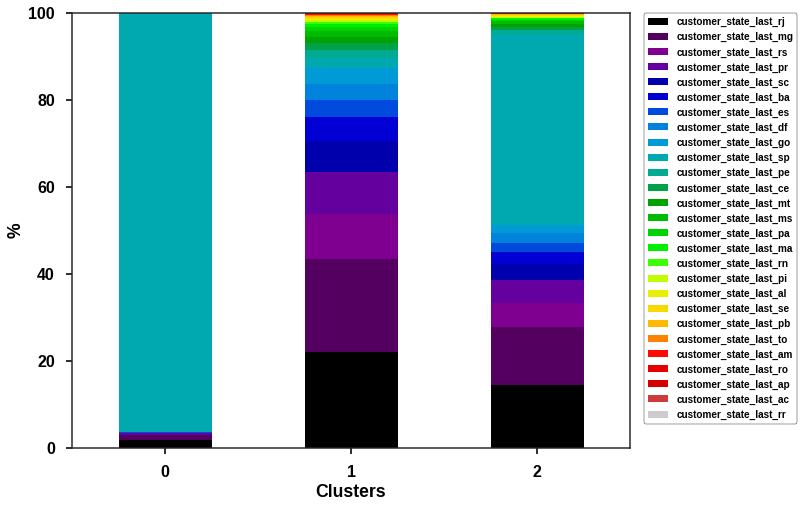

In [52]:
plt.rcParams["figure.figsize"] = [10,8]
g = dfML_KMeans_DonetChart_mean.T.plot(kind='bar', stacked=True, cmap=plt.get_cmap('nipy_spectral'))
#df.set_index('App').T.plot(kind='bar', stacked=True)
g.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0.)
g.tick_params(axis='x',rotation=0)
g.set_ylabel('%')
g.set_xlabel('Clusters')
g.set_ylim(0,100)
plt.savefig(direc0 + '2-DonetChart_KMeans.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### BoxPlot-PriceMean

In [53]:
dfML_S_E_KMeans[['price_mean','Clusters']]

,price_mean,Clusters
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,129.9,2
0000b849f77a49e4a4ce2b2a4ca5be3f,18.9,0
0000f46a3911fa3c0805444483337064,69.0,1
0000f6ccb0745a6a4b88665a16c9f078,25.99,1
0004aac84e0df4da2b147fca70cf8255,180.0,2
...,...,...
fffb09418989a0dbff854a28163e47c6,58.0,1
fffea47cd6d3cc0a88bd621562a9d061,64.89,1
ffff371b4d645b6ecea244b27531430a,89.9,1


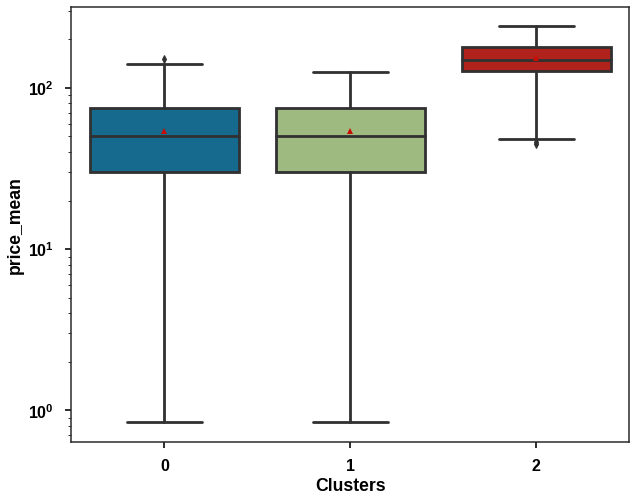

In [54]:
dfML_S_E_KMeans['Clusters'] = dfML_encoded['Clusters']
fig = plt.figure()
ax = sns.boxplot(data=dfML_S_E_KMeans[['price_mean','Clusters']],x='Clusters', y='price_mean', showfliers=True, showmeans = True)
ax.set_yscale('log')
plt.show()
fig.savefig(direc0 + '2-BoxPlot(price)_KMeans.pdf.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### Silhouette evolution

In [55]:
lsilhouetteEVOL = joblib.load(direc0 + 'npImagesB.pkl')

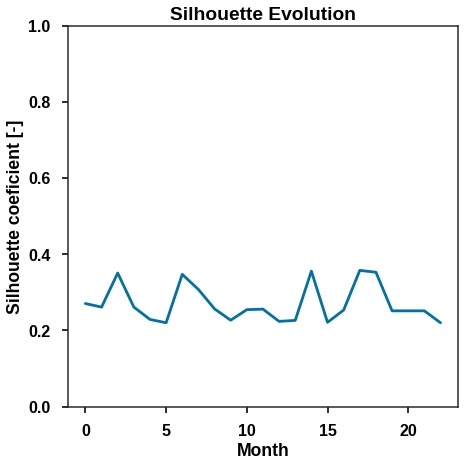

In [56]:
nc = 1
nf = 1

fig = plt.figure(figsize=(7*nc, 7*nf))

## scatter plot of Lorenz curve
plt.plot(lsilhouetteEVOL[:23])

plt.title('Silhouette Evolution')
plt.ylabel('Silhouette coeficient [-]')
plt.xlabel('Month')
#ax.set_yscale('log')
#ax.set_xscale('symlog', linthresh=10000000)
#ax.set_xlim(0, right=1)
plt.ylim(0, 1)

plt.show()
fig.savefig(direc0 + '3-dfsilhouetteEVOLUTION.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

from sklearn.metrics import silhouette_score
lsilhouetteEVOL = np.zeros(int(dfML['order_purchase_timestamp_last'].max()/30))
dfML_S_E['order_purchase_timestamp_last'] = dfML['order_purchase_timestamp_last']
dfML_S_E = dfML_S_E.sort_values('order_purchase_timestamp_last')

i = -1
for m in range(30,dfML['order_purchase_timestamp_last'].max(),30):
    i = i +1
    print(m)
    dfsilhouetteEVOLUTION = dfML_S_E[dfML_S_E['order_purchase_timestamp_last']<m]
    dfsilhouetteEVOLUTION = dfsilhouetteEVOLUTION.drop('order_purchase_timestamp_last', axis=1)

    kmeans = MiniBatchKMeans(3, random_state=10).fit(dfsilhouetteEVOLUTION)
    lsilhouetteEVOL[i] = silhouette_score(dfsilhouetteEVOLUTION, kmeans.labels_)

## Agglomerative clustering

### Mean

In [57]:
from sklearn.cluster import AgglomerativeClustering
clustering_mean = AgglomerativeClustering(linkage="complete").fit(dfML_S_E_Clustered_mean_2)
clustering_mean.labels_

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


array([1, 0, 0])

In [58]:
clustering_mean.children_

array([[1, 2],
       [0, 3]])

In [59]:
dfML_S_E_Clustered_mean_3 = dfML_S_E_Clustered_mean_2.copy()
dfML_S_E_Clustered_mean_2['AggloClusters'] = clustering_mean.labels_

dfML_S_E_Clustered_mean_3 = dfML_S_E_Clustered_mean_2.groupby(['AggloClusters']).mean()
dfML_S_E_Clustered_mean_3['N_Customer'] = dfML_S_E_Clustered_mean_2.groupby(['AggloClusters'])['N_Customer'].sum()
dfML_S_E_Clustered_mean_3 = dfML_S_E_Clustered_mean_3.sort_values(['price_mean'], ascending=False)
dfML_S_E_Clustered_mean_3.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
AggloClusters,,,,,,,,
1,8.00,5.00,9.00,9.00,5.00,4.00,7.58,2.33
0,4.00,4.00,4.00,4.00,6.00,4.00,7.70,7.67


### Median

In [60]:
from sklearn.cluster import AgglomerativeClustering
clustering_median = AgglomerativeClustering(linkage="complete").fit(dfML_S_E_Clustered_median_2)
clustering_median.labels_

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


array([0, 0, 1])

In [61]:
clustering_median.children_

array([[0, 1],
       [2, 3]])

In [62]:
dfML_S_E_Clustered_median_3 = dfML_S_E_Clustered_median_2.copy()
dfML_S_E_Clustered_median_2['AggloClusters'] = clustering_median.labels_

dfML_S_E_Clustered_median_3 = dfML_S_E_Clustered_median_2.groupby(['AggloClusters']).mean()
dfML_S_E_Clustered_median_3['N_Customer'] = dfML_S_E_Clustered_median_2.groupby(['AggloClusters'])['N_Customer'].sum()
dfML_S_E_Clustered_median_3 = dfML_S_E_Clustered_median_3.sort_values(['price_mean'], ascending=False)
dfML_S_E_Clustered_median_3.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
AggloClusters,,,,,,,,
0,7.00,4.00,6.50,6.50,6.00,10.00,10.00,6.39
1,2.00,10.00,4.00,4.00,7.00,10.00,10.00,3.61


### Results

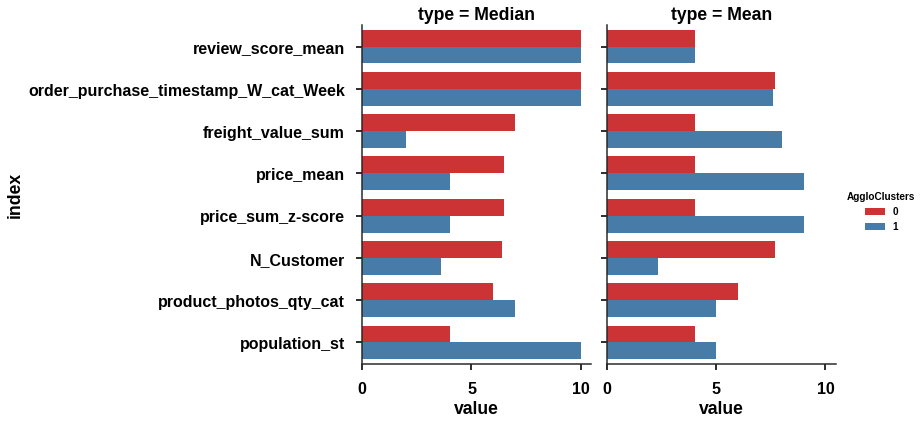

In [63]:
dfML_S_E_Clustered_median_3_lolli = dfML_S_E_Clustered_median_3.T.reset_index().sort_values(0, ascending=False)
dfML_S_E_Clustered_median_3_lolli = dfML_S_E_Clustered_median_3_lolli.melt(id_vars=['index'])
dfML_S_E_Clustered_median_3_lolli['type'] = 'Median'

dfML_S_E_Clustered_mean_3_lolli = dfML_S_E_Clustered_mean_3.T.reset_index()
dfML_S_E_Clustered_mean_3_lolli = dfML_S_E_Clustered_mean_3_lolli.melt(id_vars=['index'])
dfML_S_E_Clustered_mean_3_lolli['type'] = 'Mean'

dfML_S_E_Clustered_3_lolli = pd.concat([dfML_S_E_Clustered_median_3_lolli, dfML_S_E_Clustered_mean_3_lolli]).reset_index(drop=True)

fig = sns.catplot(x="value", y="index", hue='AggloClusters', kind="bar", col='type' , data=dfML_S_E_Clustered_3_lolli, dodge=True, palette=("Set1"), capsize=1, height=6, aspect= 1.02)
fig.savefig(direc0 + '2-Lollipop_median.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

**Cluster 0: Les 3/5 des clients n'achetent pas l'après midi et ils font plus attention a la qualitè de la photo**

**Cluster 1: L'autre 1/5 des clients achetent uniquement l'après midi (14-18h)**

# T-SNE

In [64]:
dfML_encoded

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,Clusters
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,12.0,33599,129.9,0.913424,0.0,4.0,1.0,2
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,33599,18.9,-1.101578,0.0,3.0,1.0,0
0000f46a3911fa3c0805444483337064,17.22,2724,69.0,-0.192104,2.0,2.0,1.0,1
0000f6ccb0745a6a4b88665a16c9f078,17.63,379,25.99,-0.972872,3.0,3.0,1.0,1
0004aac84e0df4da2b147fca70cf8255,16.89,33599,180.0,1.822897,2.0,4.0,1.0,2
...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,15.16,4065,58.0,-0.391789,0.0,4.0,0.0,1
fffea47cd6d3cc0a88bd621562a9d061,19.69,2150,64.89,-0.266714,1.0,3.0,0.0,1
ffff371b4d645b6ecea244b27531430a,22.56,531,89.9,0.187297,3.0,4.0,1.0,1


dfML_encoded['Clusters'] = dfML_encoded['Clusters']
dfML_S_E_KMeans_Clustered = dfML_encoded.copy()

In [65]:
from sklearn.model_selection import train_test_split
dfML_encoded_train, dfML_encoded_Clustered_test = train_test_split(dfML_encoded, test_size=0.95, random_state=42)
dfML_encoded_train.shape

(3652, 8)

In [66]:
#dfML_S_E_GaussMix = dfML_S_E_train.copy()

dfML_S_E_KMeans_Clustered = dfML_encoded
dfML_S_E_KMeans_Clustered['Clusters'] = dfML_S_E_KMeans['Clusters']

min_bic = np.infty
prxMIN=np.sqrt(len(dfML_S_E_KMeans_Clustered))*1/2
prxMAX=np.sqrt(len(dfML_S_E_KMeans_Clustered))*2/3
lprx = np.int64(np.linspace(prxMIN, prxMAX, 3).round(0))
times = np.zeros((np.int64(prxMAX.round(0))+2))

for prx in lprx:
    t1 = time.time()

    tsne = TSNE(n_components=2, random_state=42, perplexity=prx, n_iter=300)
    npML_S_E_KMeans_Clustered_tsne = tsne.fit_transform(dfML_S_E_KMeans_Clustered)
    joblib.dump(npML_S_E_KMeans_Clustered_tsne, direc0 + 'TSNE_prx-' + str(prx) +'.pkl')

    t2 = time.time()
    
    print(t2-t1)
    times[prx] = t2-t1

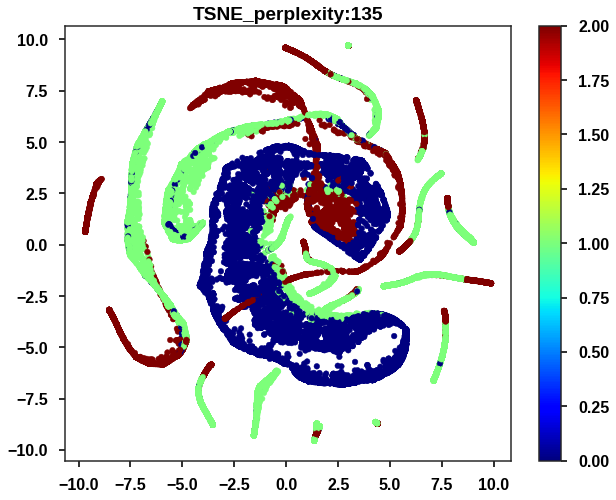

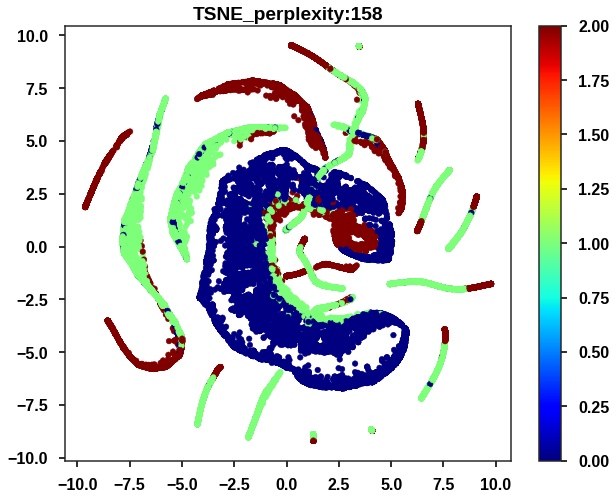

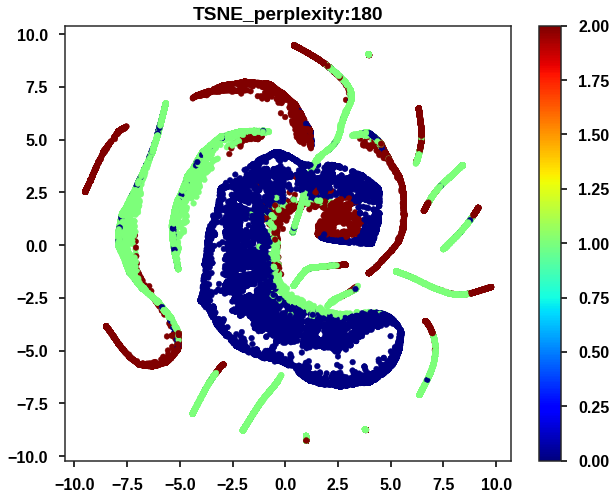

In [67]:
for prx in lprx:
    fig = plt.figure()
    npML_S_E_KMeans_Clustered_tsne = joblib.load(direc0 + 'TSNE_prx-' + str(prx) +'.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')
    
    #plt.figure(figsize=(13,10))
    fig = plt.scatter(npML_S_E_KMeans_Clustered_tsne[:, 0], npML_S_E_KMeans_Clustered_tsne[:, 1], c=dfML_S_E_KMeans_Clustered['Clusters'], cmap="jet") #, cmap="jet")
    plt.title('TSNE_perplexity:' + str(prx))
    plt.colorbar()
    plt.show()
    #fig.savefig(direc0 + '4-TSNE_prx-' + str(prx) +'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

# Gaussian Mixtures

## Model selection

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

Let's search for best combination of values for both the number of clusters and the `covariance_type` hyperparameter:

In [68]:
from sklearn.model_selection import train_test_split
dfML_S_E_train, dfML_S_E_test = train_test_split(dfML_S_E, test_size=0.95, random_state=42)
dfML_S_E_train.shape

(3652, 4)

In [69]:
dfML_S_E_GaussMix = dfML_S_E.copy()

min_bic = np.infty
kmin=1
kmax=12
times = np.zeros((30,4))
BIC_k = np.zeros((30,4))
AIC_k = np.zeros((30,4))

for k in range(kmin,kmax):
    for icovariance_type, covariance_type in enumerate(["full", "tied", "spherical", "diag"]):
        t1 = time.time()
        
        gms_k = GaussianMixture(n_components=k, n_init=10, covariance_type=covariance_type, random_state=42).fit(dfML_S_E_train)
        AIC_k[k, icovariance_type] = gms_k.aic(dfML_S_E_GaussMix)
        BIC_k[k, icovariance_type] = gms_k.bic(dfML_S_E_GaussMix)
        bic = BIC_k[k, icovariance_type]
        
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type
        
        t2 = time.time()

        times[k, icovariance_type] = t2-t1

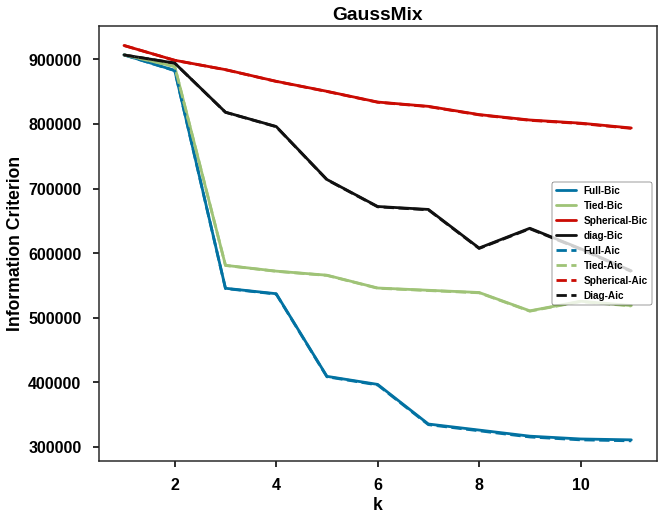

In [70]:
plt.rcParams["figure.figsize"] = [10,8]

fig = plt.figure()

plt.plot(range(kmin,kmax), BIC_k[range(kmin,kmax),0],  "b", label="Full-Bic") #"b-o",
plt.plot(range(kmin,kmax), BIC_k[range(kmin,kmax),1],  "g", label="Tied-Bic") #"b-o",
plt.plot(range(kmin,kmax), BIC_k[range(kmin,kmax),2],  "r", label="Spherical-Bic") #"b-o",
plt.plot(range(kmin,kmax), BIC_k[range(kmin,kmax),3], "k", label="diag-Bic") #"b-o",

plt.plot(range(kmin,kmax), AIC_k[range(kmin,kmax),0], "b--", label="Full-Aic") #"b-o",
plt.plot(range(kmin,kmax), AIC_k[range(kmin,kmax),1], "g--", label="Tied-Aic") #"b-o",
plt.plot(range(kmin,kmax), AIC_k[range(kmin,kmax),2],  "r--", label="Spherical-Aic") #"b-o",
plt.plot(range(kmin,kmax), AIC_k[range(kmin,kmax),3],  "k--", label="Diag-Aic") #"b-o",

plt.xlabel("k")
plt.ylabel("Information Criterion")
plt.legend(loc="center right")
plt.title("GaussMix")
fig.savefig(direc0 + '3-GaussMix_BIC.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

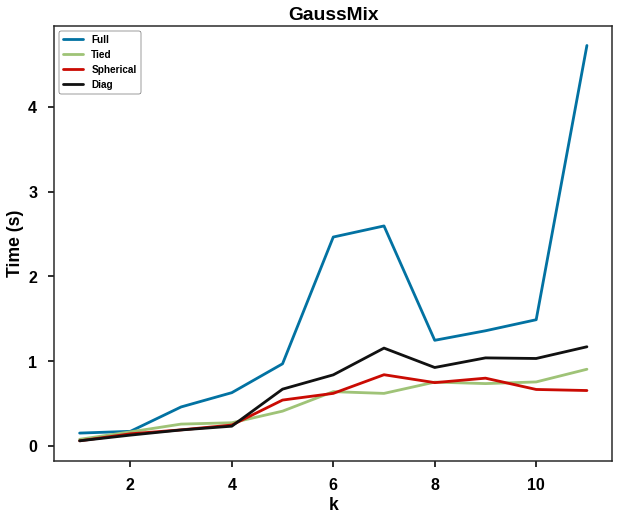

In [71]:
fig = plt.figure()

plt.plot(range(kmin,kmax), times[range(kmin,kmax),0],   "b", label="Full") #"b-o",
plt.plot(range(kmin,kmax), times[range(kmin,kmax),1],   "g", label="Tied") #"b-o",
plt.plot(range(kmin,kmax), times[range(kmin,kmax),2],   "r", label="Spherical") #"b-o",
plt.plot(range(kmin,kmax), times[range(kmin,kmax),3],   "k", label="Diag") #"b-o",
plt.xlabel("k")
plt.ylabel("Time (s)")
plt.legend(loc="upper left")
plt.title("GaussMix")
fig.savefig(direc0 + '3-GaussMix_Time.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [72]:
best_k

11

In [73]:
best_covariance_type

'full'

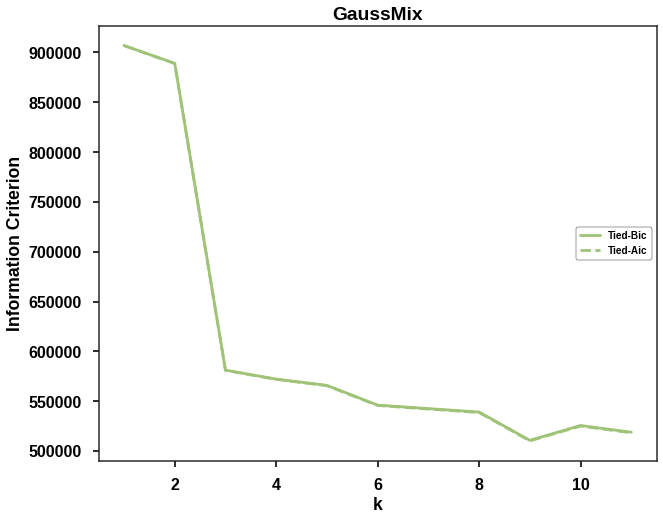

In [74]:
fig = plt.figure()

plt.plot(range(kmin,kmax), BIC_k[range(kmin,kmax),1],  "g", label="Tied-Bic") #"b-o",

plt.plot(range(kmin,kmax), AIC_k[range(kmin,kmax),1], "g--", label="Tied-Aic") #"b-o",

plt.xlabel("k")
plt.ylabel("Information Criterion")
plt.legend(loc="center right")
plt.title("GaussMix")
fig.savefig(direc0 + '3-GaussMix_BIC_Best.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [75]:
gm = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42).fit(dfML_S_E)

In [76]:
gm.converged_

True

In [77]:
gm.n_iter_

7

In [78]:
gm.weights_

array([0.13458854, 0.23256769, 0.63284377])

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

## Result

In [79]:
dfML_S_E_GaussMix = dfML.copy()
dfML_S_E_GaussMix = dfML_S_E_GaussMix.drop(['product_category_name'], axis=1)

dfML_S_E_GaussMix['Clusters'] = gm.predict(dfML_S_E)
dfML_S_E_GaussMix

,customer_state_last,estimated_delivered_time_mean,freight_value_sum,item_number_cat,o_purchase_time_H_cat,order_purchase_timestamp_W_cat,order_purchase_timestamp_last,population_cat,population_st,price_and_freight_sum_cat,price_mean,price_sum,price_sum_z-score,product_name_lenght_cat_mean,product_photos_qty_cat,review_score_mean,Clusters
customer_unique_id,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,sp,10,12.0,1,7-12,Week,111,Rural,33599,2,129.9,129.9,0.913424,4,1,5,2
0000b849f77a49e4a4ce2b2a4ca5be3f,sp,7,8.29,2,7-12,Week,114,Rural,33599,1,18.9,18.9,-1.101578,3,1,4,2
0000f46a3911fa3c0805444483337064,sc,27,17.22,2,18-23,Week,536,Rural,2724,1,69.0,69.0,-0.192104,1,3,3,2
0000f6ccb0745a6a4b88665a16c9f078,pa,31,17.63,2,18-23,Week,320,Rural,379,1,25.99,25.99,-0.972872,1,4,4,2
0004aac84e0df4da2b147fca70cf8255,sp,20,16.89,2,18-23,Week,287,Rural,33599,3,180.0,180.0,1.822897,3,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,rs,31,15.16,1,18-23,Weekend,254,Rural,4065,1,58.0,58.0,-0.391789,1,1,5,1
fffea47cd6d3cc0a88bd621562a9d061,ba,32,19.69,1,18-23,Weekend,261,Rural,2150,1,64.89,64.89,-0.266714,1,2,4,1
ffff371b4d645b6ecea244b27531430a,mt,44,22.56,1,14-18,Week,568,Rural,531,2,89.9,89.9,0.187297,3,4,5,2


### Mean

In [80]:
dfML_S_E_encoded_GaussMix = dfML_encoded.copy()
dfML_S_E_encoded_GaussMix['Clusters'] = gm.predict(dfML_S_E)

dfML_S_E_GaussMix_Clustered_mean = dfML_S_E_encoded_GaussMix.groupby(['Clusters']).mean()
dfML_S_E_GaussMix_Clustered_mean['N_Customer'] = dfML_S_E_encoded_GaussMix.groupby(['Clusters'])['price_mean'].count()/len(dfML_S_E_encoded_GaussMix)
dfML_S_E_GaussMix_Clustered_mean = dfML_S_E_GaussMix_Clustered_mean.sort_values(['price_mean'], ascending=False)
dfML_S_E_GaussMix_Clustered_mean.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
Clusters,,,,,,,,
0,18.48,"19,127.21",171.70,1.81,0.87,3.23,1.00,0.12
1,16.03,"18,372.35",77.61,0.02,1.02,3.16,0.00,0.23
2,15.18,"18,364.94",60.34,-0.33,1.02,3.15,1.00,0.65


### Median

In [81]:
dfML_S_E_encoded_GaussMix = dfML_encoded.copy()
dfML_S_E_encoded_GaussMix['Clusters'] = gm.predict(dfML_S_E)

dfML_S_E_GaussMix_Clustered_median = dfML_S_E_encoded_GaussMix.groupby(['Clusters']).median()
dfML_S_E_GaussMix_Clustered_median['N_Customer'] = dfML_S_E_encoded_GaussMix.groupby(['Clusters'])['price_mean'].count()/len(dfML_S_E_encoded_GaussMix)
dfML_S_E_GaussMix_Clustered_median = dfML_S_E_GaussMix_Clustered_median.sort_values(['price_mean'], ascending=False)
dfML_S_E_GaussMix_Clustered_median.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
Clusters,,,,,,,,
0,17.70,"9,394.00",169.90,1.65,0.00,4.00,1.00,0.12
1,15.45,"9,394.00",62.00,-0.26,1.00,4.00,0.00,0.23
2,15.10,"9,394.00",54.91,-0.45,1.00,4.00,1.00,0.65


### Scaling

dfML_S_E_Clustered_mean_2 = dfML_S_E_Clustered_mean.copy()
for iVAR in dfML_encoded.columns.difference(['Clusters']):
    delta=dfML_encoded[iVAR].max()-dfML_encoded[iVAR].min()
    n=-dfML_encoded[iVAR].min()/delta
    m=1/delta
    dfML_S_E_Clustered_mean_2[iVAR]=m*dfML_S_E_Clustered_mean[iVAR]+n
dfML_S_E_Clustered_mean_2.style.format('{0:,.2f}').background_gradient()

In [82]:
dfML_S_E_GaussMix_Clustered_mean_2 = dfML_S_E_GaussMix_Clustered_mean.copy()
nbr_cat= 10+1 #10%

for iVAR in dfML_S_E_GaussMix_Clustered_mean.loc[:,:'review_score_mean'].columns:
    for q in range(0,nbr_cat,1):
        quartil = np.array(dfML_encoded[iVAR].quantile([q/nbr_cat]))[0]
        lindex = dfML_S_E_GaussMix_Clustered_mean[iVAR][dfML_S_E_GaussMix_Clustered_mean[iVAR]>=quartil].index
        dfML_S_E_GaussMix_Clustered_mean_2.loc[lindex, iVAR] = q

dfML_S_E_GaussMix_Clustered_mean_2.loc[:,'order_purchase_timestamp_W_cat_Week':] = dfML_S_E_GaussMix_Clustered_mean.loc[:,'order_purchase_timestamp_W_cat_Week':]*10 #10% pour les variables cat de OneHotEncoder

dfML_S_E_GaussMix_Clustered_mean_2.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
Clusters,,,,,,,,
0,8.00,5.00,10.00,10.00,5.00,4.00,10.00,1.17
1,6.00,5.00,6.00,6.00,7.00,4.00,0.00,2.33
2,5.00,5.00,5.00,5.00,7.00,4.00,10.00,6.51


In [83]:
dfML_S_E_GaussMix_Clustered_median_2 = dfML_S_E_GaussMix_Clustered_median.copy()
nbr_cat= 10+1 #10%

for iVAR in dfML_S_E_GaussMix_Clustered_median.loc[:,:'review_score_mean'].columns:
    for q in range(0,nbr_cat,1):
        quartil = np.array(dfML_encoded[iVAR].quantile([q/nbr_cat]))[0]
        lindex = dfML_S_E_GaussMix_Clustered_median[iVAR][dfML_S_E_GaussMix_Clustered_median[iVAR]>=quartil].index
        dfML_S_E_GaussMix_Clustered_median_2.loc[lindex, iVAR] = q

dfML_S_E_GaussMix_Clustered_median_2.loc[:,'order_purchase_timestamp_W_cat_Week':] = dfML_S_E_GaussMix_Clustered_median.loc[:,'order_purchase_timestamp_W_cat_Week':]*10 #10% pour les variables cat de OneHotEncoder

dfML_S_E_GaussMix_Clustered_median_2.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
Clusters,,,,,,,,
0,7.00,5.00,10.00,10.00,5.00,10.00,10.00,1.17
1,5.00,5.00,5.00,5.00,7.00,10.00,0.00,2.33
2,5.00,5.00,4.00,4.00,7.00,10.00,10.00,6.51


### Lollopop Chart

<Figure size 720x576 with 0 Axes>

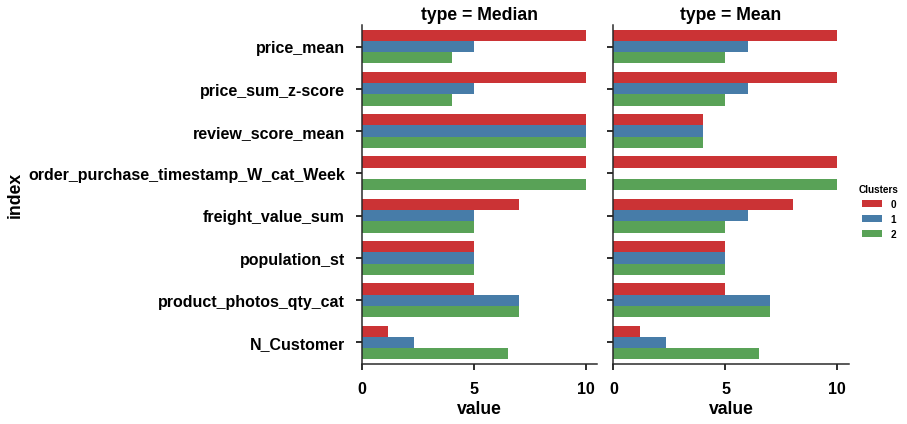

In [84]:
fig = plt.figure()

dfML_S_E_Clustered_median_2_lolli = dfML_S_E_GaussMix_Clustered_median_2.T.reset_index().sort_values(0, ascending=False)
dfML_S_E_Clustered_median_2_lolli = dfML_S_E_Clustered_median_2_lolli.melt(id_vars=['index'])
dfML_S_E_Clustered_median_2_lolli['type'] = 'Median'

dfML_S_E_Clustered_mean_2_lolli = dfML_S_E_GaussMix_Clustered_mean_2.T.reset_index()
dfML_S_E_Clustered_mean_2_lolli = dfML_S_E_Clustered_mean_2_lolli.melt(id_vars=['index'])
dfML_S_E_Clustered_mean_2_lolli['type'] = 'Mean'

dfML_S_E_Clustered_2_lolli = pd.concat([dfML_S_E_Clustered_median_2_lolli, dfML_S_E_Clustered_mean_2_lolli]).reset_index(drop=True)

fig = sns.catplot(x="value", y="index", hue='Clusters', kind="bar", col='type' , data=dfML_S_E_Clustered_2_lolli, dodge=True, palette=("Set1"), capsize=1, height=6, aspect= 1.02)
fig.savefig(direc0 + '2-Lollipop_GaussMix.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### StackBar Chart

In [85]:
#DF Encoding
dfML_GaussMix_DonetChart = dfML_encoded.copy()
dfML_GaussMix_DonetChart['customer_state_last'] = dfML['customer_state_last']
dfML_GaussMix_DonetChart['Clusters'] = gm.predict(dfML_S_E)

dfML_GaussMix_DonetChart

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,Clusters,customer_state_last
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,12.0,33599,129.9,0.913424,0.0,4.0,1.0,2,sp
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,33599,18.9,-1.101578,0.0,3.0,1.0,2,sp
0000f46a3911fa3c0805444483337064,17.22,2724,69.0,-0.192104,2.0,2.0,1.0,2,sc
0000f6ccb0745a6a4b88665a16c9f078,17.63,379,25.99,-0.972872,3.0,3.0,1.0,2,pa
0004aac84e0df4da2b147fca70cf8255,16.89,33599,180.0,1.822897,2.0,4.0,1.0,0,sp
...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,15.16,4065,58.0,-0.391789,0.0,4.0,0.0,1,rs
fffea47cd6d3cc0a88bd621562a9d061,19.69,2150,64.89,-0.266714,1.0,3.0,0.0,1,ba
ffff371b4d645b6ecea244b27531430a,22.56,531,89.9,0.187297,3.0,4.0,1.0,2,mt


#### OneHotEncoder

In [86]:
lVAR_OneHotEncoder = ['customer_state_last']
dfML_GaussMix_DonetChart[lVAR_OneHotEncoder].head(2)

,customer_state_last
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,sp
0000b849f77a49e4a4ce2b2a4ca5be3f,sp


In [87]:
for iVAR in lVAR_OneHotEncoder:
    enc = OneHotEncoder()
    X = enc.fit_transform(dfML_GaussMix_DonetChart[[iVAR]].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = enc.get_feature_names([iVAR]).tolist(), index = dfML_GaussMix_DonetChart.index)
    dfML_GaussMix_DonetChart = pd.concat([dfML_GaussMix_DonetChart, dfOneHot], axis=1)

    dfML_GaussMix_DonetChart = dfML_GaussMix_DonetChart.drop(iVAR, axis=1)

dfML_GaussMix_DonetChart

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,Clusters,customer_state_last_ac,customer_state_last_al,customer_state_last_am,customer_state_last_ap,customer_state_last_ba,customer_state_last_ce,customer_state_last_df,customer_state_last_es,customer_state_last_go,customer_state_last_ma,customer_state_last_mg,customer_state_last_ms,customer_state_last_mt,customer_state_last_pa,customer_state_last_pb,customer_state_last_pe,customer_state_last_pi,customer_state_last_pr,customer_state_last_rj,customer_state_last_rn,customer_state_last_ro,customer_state_last_rr,customer_state_last_rs,customer_state_last_sc,customer_state_last_se,customer_state_last_sp,customer_state_last_to
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,12.0,33599,129.9,0.913424,0.0,4.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,33599,18.9,-1.101578,0.0,3.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0000f46a3911fa3c0805444483337064,17.22,2724,69.0,-0.192104,2.0,2.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,17.63,379,25.99,-0.972872,3.0,3.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,16.89,33599,180.0,1.822897,2.0,4.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,15.16,4065,58.0,-0.391789,0.0,4.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,19.69,2150,64.89,-0.266714,1.0,3.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,22.56,531,89.9,0.187297,3.0,4.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
dfML_GaussMix_DonetChart_mean = dfML_GaussMix_DonetChart.groupby(['Clusters']).mean()
dfML_GaussMix_DonetChart_mean['N_Customer'] = dfML_GaussMix_DonetChart.groupby(['Clusters'])['price_mean'].count()/len(dfML_GaussMix_DonetChart)
dfML_GaussMix_DonetChart_mean = dfML_GaussMix_DonetChart_mean.drop(['price_sum_z-score','freight_value_sum','population_st','price_mean','product_photos_qty_cat','review_score_mean','order_purchase_timestamp_W_cat_Week', 'N_Customer'], axis=1).T
dfML_GaussMix_DonetChart_mean = dfML_GaussMix_DonetChart_mean.sort_values([1], ascending=False)*100
dfML_GaussMix_DonetChart_mean.style.format('{0:,.2f}').background_gradient()

Clusters,0,1,2
customer_state_last_sp,48.16,45.67,45.72
customer_state_last_rj,12.99,13.24,12.70
customer_state_last_mg,12.14,12.04,12.27
customer_state_last_rs,5.00,5.71,5.61
customer_state_last_pr,4.59,5.38,5.37
customer_state_last_sc,3.59,3.52,3.83
customer_state_last_ba,2.71,3.01,2.96
customer_state_last_es,2.17,2.13,2.07
customer_state_last_df,2.16,1.98,2.00
customer_state_last_go,1.67,1.90,2.00


<Figure size 720x576 with 0 Axes>

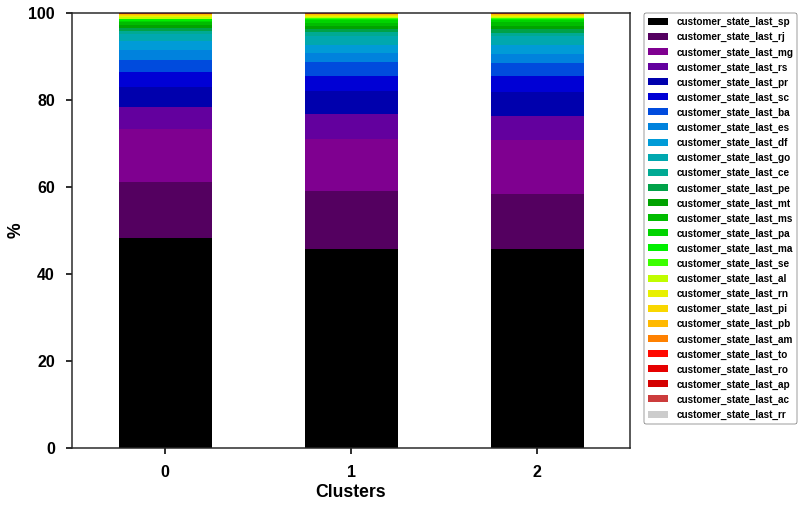

In [89]:
fig = plt.figure()
g = dfML_GaussMix_DonetChart_mean.T.plot(kind='bar', stacked=True, cmap=plt.get_cmap('nipy_spectral'))
#df.set_index('App').T.plot(kind='bar', stacked=True)
g.legend(bbox_to_anchor=(1.3, 1), loc='upper right', borderaxespad=0.)
g.tick_params(axis='x',rotation=0)
g.set_ylabel('%')
g.set_xlabel('Clusters')
g.set_ylim(0,100)
plt.savefig(direc0 + '2-DonetChart_GaussMix.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### BoxPlot-PriceMean

In [90]:
dfML_S_E_GaussMix[['price_mean','Clusters']]

,price_mean,Clusters
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,129.9,2
0000b849f77a49e4a4ce2b2a4ca5be3f,18.9,2
0000f46a3911fa3c0805444483337064,69.0,2
0000f6ccb0745a6a4b88665a16c9f078,25.99,2
0004aac84e0df4da2b147fca70cf8255,180.0,0
...,...,...
fffb09418989a0dbff854a28163e47c6,58.0,1
fffea47cd6d3cc0a88bd621562a9d061,64.89,1
ffff371b4d645b6ecea244b27531430a,89.9,2


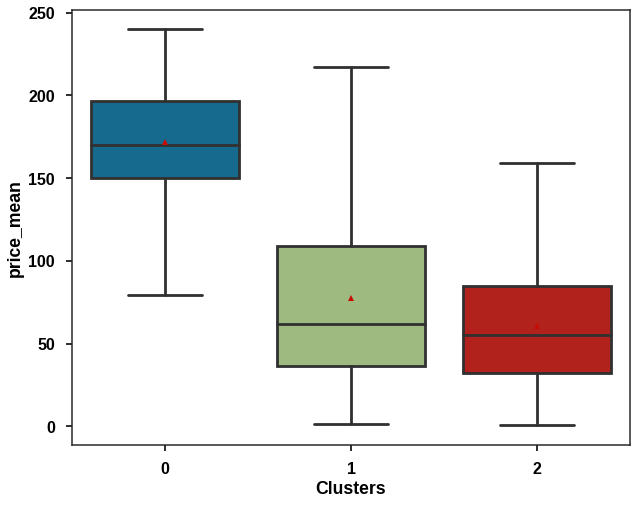

In [91]:
fig = plt.figure()
sns.boxplot(data=dfML_S_E_GaussMix[['price_mean','Clusters']],x='Clusters', y='price_mean', showfliers=False, showmeans = True)
plt.show()
ax.set_yscale('log')
fig.savefig(direc0 + '2-BoxPlot(price)_GaussMix.pdf.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

# DBSCAN

In [92]:
#dfML_encoded = dfML_encoded.drop(['Clusters'], axis=1)
dfML_S_E_DBSCAN = dfML_S_E.copy()

from sklearn.model_selection import train_test_split
dfML_S_E_DBSCAN_train, dfML_S_E_KMeans_Clustered_test = train_test_split(dfML_S_E_DBSCAN, test_size=0.3, random_state=42)
dfML_S_E_DBSCAN_train.shape

## Optimal Epsilon Value

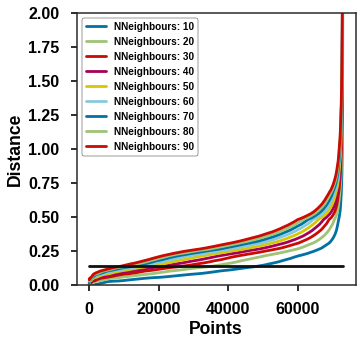

In [93]:
from sklearn.neighbors import NearestNeighbors
dfML_S_E_DBSCAN = dfML_S_E_DBSCAN
N = range(10,100,10)
fig = plt.figure(figsize=(5, 5))

for n in N:

    nearest_neighbors = NearestNeighbors(n_neighbors=n)
    neighbors = nearest_neighbors.fit(dfML_S_E_DBSCAN)
    distances, indices = neighbors.kneighbors(dfML_S_E_DBSCAN)
    distances = np.sort(distances[:,n-1], axis=0)

    plt.plot(distances, label='NNeighbours: '+str(n))

plt.xlabel("Points")
plt.ylabel("Distance")
plt.legend(loc="upper left")

plt.ylim(0,2)
plt.plot([0,len(dfML_S_E_DBSCAN)], [0.14,0.14], color='k')

fig.savefig(direc0 + '4-DBSCAN_Epsilon.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [94]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3).fit(dfML_S_E_DBSCAN) #eps=0.9
dfML_S_E_DBSCAN['Clusters'] = db.labels_
dfML_S_E_DBSCAN

,0,1,2,3,Clusters
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.767627,-1.844166,-0.583618,-0.349376,0
0000b849f77a49e4a4ce2b2a4ca5be3f,-2.140439,-0.940465,-0.960874,-0.154409,0
0000f46a3911fa3c0805444483337064,0.063339,1.233248,0.011404,-0.595715,0
0000f6ccb0745a6a4b88665a16c9f078,-0.913461,1.712305,1.120578,-1.031481,0
0004aac84e0df4da2b147fca70cf8255,2.304940,-1.788346,0.716657,-0.798705,0
...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,-0.325683,0.782547,0.393466,1.663855,2
fffea47cd6d3cc0a88bd621562a9d061,0.184103,1.442756,0.650144,1.611059,2
ffff371b4d645b6ecea244b27531430a,0.953544,1.388634,1.536360,-1.240556,3


## Result

In [95]:
dfML_encoded['Clusters'] = db.labels_
dfML_S_E_DBSCAN_Clustered_mean = dfML_S_E_DBSCAN.copy()

dfML_S_E_DBSCAN_Clustered_mean = dfML_encoded.groupby(['Clusters']).mean()
dfML_S_E_DBSCAN_Clustered_mean['N_Customer'] = dfML_encoded.groupby(['Clusters'])['price_mean'].count()/len(dfML_encoded)
dfML_S_E_DBSCAN_Clustered_mean = dfML_S_E_DBSCAN_Clustered_mean.sort_values(['price_mean'], ascending=False)
dfML_S_E_DBSCAN_Clustered_mean.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
Clusters,,,,,,,,
37,9.83,"33,599.00",232.78,2.78,0.00,4.00,0.00,0.00
7,8.88,"33,599.00",232.64,2.78,1.00,4.00,1.00,0.00
33,15.97,"9,298.00",231.38,2.76,0.00,0.00,0.00,0.00
44,15.24,"33,599.00",230.96,2.75,0.00,0.00,0.00,0.00
9,19.25,"18,290.88",223.90,2.62,2.25,3.75,0.00,0.00
6,15.34,"33,599.00",222.80,2.60,3.00,4.00,0.00,0.00
41,14.85,"33,599.00",220.78,2.56,0.20,0.80,0.00,0.00
29,13.30,"33,599.00",219.15,2.53,0.00,3.00,0.00,0.00
24,13.98,"33,599.00",212.62,2.42,0.33,0.67,1.00,0.00


In [96]:
dfML_S_E_DBSCAN_Clustered_median = dfML_S_E_DBSCAN.copy()

dfML_S_E_DBSCAN_Clustered_median = dfML_encoded.groupby(['Clusters']).median()
dfML_S_E_DBSCAN_Clustered_median['N_Customer'] = dfML_encoded.groupby(['Clusters'])['price_mean'].count()/len(dfML_encoded)
dfML_S_E_DBSCAN_Clustered_median = dfML_S_E_DBSCAN_Clustered_median.sort_values(['price_mean'], ascending=False)
dfML_S_E_DBSCAN_Clustered_median.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
Clusters,,,,,,,,
38,19.93,"21,496.50",233.50,2.91,1.50,3.50,0.00,0.00
37,10.03,"33,599.00",233.00,2.79,0.00,4.00,0.00,0.00
44,15.21,"33,599.00",229.94,2.73,0.00,0.00,0.00,0.00
7,8.87,"33,599.00",229.80,2.73,1.00,4.00,1.00,0.00
33,16.32,"9,394.00",229.00,2.71,0.00,0.00,0.00,0.00
9,16.37,"9,394.00",227.45,2.68,2.00,4.00,0.00,0.00
41,14.04,"33,599.00",220.01,2.55,0.00,1.00,0.00,0.00
6,15.14,"33,599.00",219.99,2.55,3.00,4.00,0.00,0.00
10,21.92,"33,599.00",219.00,2.55,1.00,4.00,1.00,0.00


### Scaling

dfML_S_E_DBSCAN_Clustered_mean_2 = dfML_S_E_DBSCAN_Clustered_mean.copy()
for iVAR in dfML_S_E_DBSCAN_Clustered.columns.difference(['Clusters']):
    delta=dfML_S_E_DBSCAN_Clustered[iVAR].max()-dfML_S_E_DBSCAN_Clustered[iVAR].min()
    n=-dfML_S_E_DBSCAN_Clustered[iVAR].min()/delta
    m=1/delta
    dfML_S_E_DBSCAN_Clustered_mean_2[iVAR]=m*dfML_S_E_DBSCAN_Clustered_mean[iVAR]+n
dfML_S_E_DBSCAN_Clustered_mean_2.style.format('{0:,.2f}').background_gradient()

In [97]:
dfML_S_E_DBSCAN_Clustered_mean_2 = dfML_S_E_DBSCAN_Clustered_mean.copy()
nbr_cat= 10+1 #10%

for iVAR in dfML_S_E_DBSCAN_Clustered_mean.loc[:,:'review_score_mean'].columns:
    for q in range(0,nbr_cat,1):
        quartil = np.array(dfML_encoded[iVAR].quantile([q/nbr_cat]))[0]
        lindex = dfML_S_E_DBSCAN_Clustered_mean[iVAR][dfML_S_E_DBSCAN_Clustered_mean[iVAR]>=quartil].index
        dfML_S_E_DBSCAN_Clustered_mean_2.loc[lindex, iVAR] = q

#dfML_S_E_DBSCAN_Clustered_mean_2.loc[:,'o_purchase_time_H_cat_12-14':] = dfML_S_E_DBSCAN_Clustered_mean.loc[:,'o_purchase_time_H_cat_12-14':]*10 #10% pour les variables cat de OneHotEncoder
dfML_S_E_DBSCAN_Clustered_mean_2.loc[:,'order_purchase_timestamp_W_cat_Week':] = dfML_S_E_DBSCAN_Clustered_mean.loc[:,'order_purchase_timestamp_W_cat_Week':]*10 #10% pour les variables cat de OneHotEncoder

dfML_S_E_DBSCAN_Clustered_mean_2.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
Clusters,,,,,,,,
37,1.00,10.00,10.00,10.00,5.00,10.00,0.00,0.00
7,1.00,10.00,10.00,10.00,7.00,10.00,10.00,0.00
33,6.00,4.00,10.00,10.00,5.00,1.00,0.00,0.00
44,5.00,10.00,10.00,10.00,5.00,1.00,0.00,0.00
9,8.00,5.00,10.00,10.00,8.00,4.00,0.00,0.00
6,5.00,10.00,10.00,10.00,10.00,10.00,0.00,0.00
41,4.00,10.00,10.00,10.00,5.00,1.00,0.00,0.00
29,3.00,10.00,10.00,10.00,5.00,4.00,0.00,0.00
24,3.00,10.00,10.00,10.00,5.00,1.00,10.00,0.00


In [98]:
dfML_S_E_DBSCAN_Clustered_median_2 = dfML_S_E_DBSCAN_Clustered_median.copy()
nbr_cat= 10+1 #10%

for iVAR in dfML_S_E_DBSCAN_Clustered_median_2.columns.difference(['N_Customer']):
    for q in range(0,nbr_cat,1):
        quartil = np.array(dfML_encoded[iVAR].quantile([q/nbr_cat]))[0]
        lindex = dfML_S_E_DBSCAN_Clustered_median[iVAR][dfML_S_E_DBSCAN_Clustered_median[iVAR]>=quartil].index
        dfML_S_E_DBSCAN_Clustered_median_2.loc[lindex, iVAR] = q

dfML_S_E_DBSCAN_Clustered_median_2.loc[:,'order_purchase_timestamp_W_cat_Week':] = dfML_S_E_DBSCAN_Clustered_median.loc[:,'order_purchase_timestamp_W_cat_Week':]*10 #10% pour les variables cat de OneHotEncoder

dfML_S_E_DBSCAN_Clustered_median_2.style.format('{0:,.2f}').background_gradient()

,freight_value_sum,population_st,price_mean,price_sum_z-score,product_photos_qty_cat,review_score_mean,order_purchase_timestamp_W_cat_Week,N_Customer
Clusters,,,,,,,,
38,9.00,5.00,10.00,10.00,7.00,4.00,0.00,0.00
37,1.00,10.00,10.00,10.00,5.00,10.00,0.00,0.00
44,5.00,10.00,10.00,10.00,5.00,1.00,0.00,0.00
7,1.00,10.00,10.00,10.00,7.00,10.00,10.00,0.00
33,6.00,5.00,10.00,10.00,5.00,1.00,0.00,0.00
9,6.00,5.00,10.00,10.00,8.00,10.00,0.00,0.00
41,3.00,10.00,10.00,10.00,5.00,1.00,0.00,0.00
6,5.00,10.00,10.00,10.00,10.00,10.00,0.00,0.00
10,9.00,10.00,10.00,10.00,7.00,10.00,10.00,0.00


### Lollopop Chart

<Figure size 720x576 with 0 Axes>

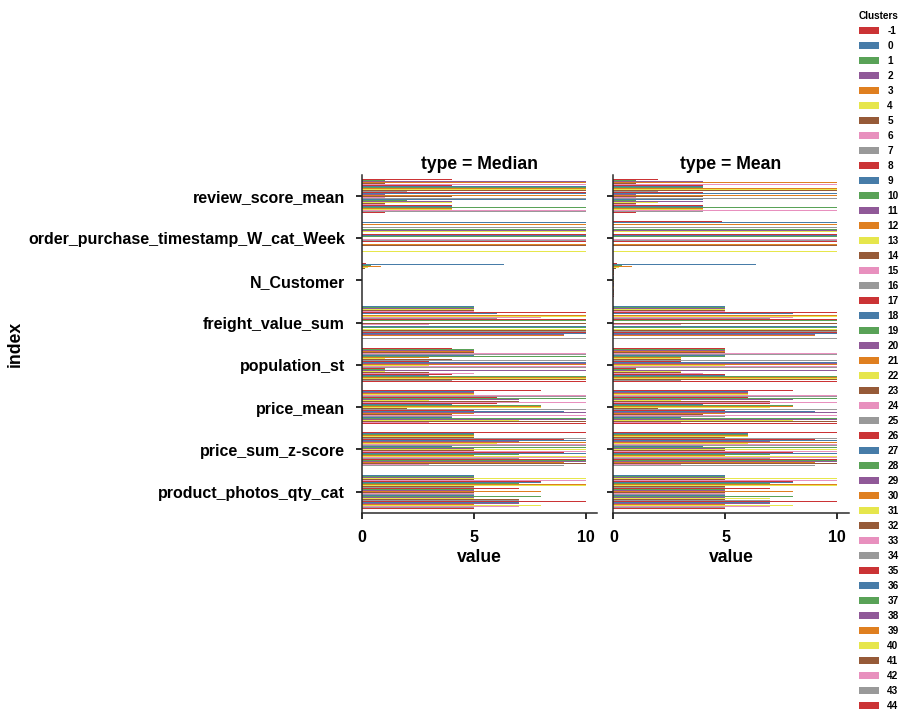

In [99]:
fig = plt.figure()
dfML_S_E_DBSCAN_Clustered_median_2_lolli = dfML_S_E_DBSCAN_Clustered_median_2.T.reset_index().sort_values(0, ascending=False)
dfML_S_E_DBSCAN_Clustered_median_2_lolli = dfML_S_E_DBSCAN_Clustered_median_2_lolli.melt(id_vars=['index'])
dfML_S_E_DBSCAN_Clustered_median_2_lolli['type'] = 'Median'

dfML_S_E_DBSCAN_Clustered_mean_2_lolli = dfML_S_E_DBSCAN_Clustered_mean_2.T.reset_index()
dfML_S_E_DBSCAN_Clustered_mean_2_lolli = dfML_S_E_DBSCAN_Clustered_mean_2_lolli.melt(id_vars=['index'])
dfML_S_E_DBSCAN_Clustered_mean_2_lolli['type'] = 'Mean'

dfML_S_E_Clustered_2_lolli = pd.concat([dfML_S_E_DBSCAN_Clustered_median_2_lolli, dfML_S_E_DBSCAN_Clustered_mean_2_lolli]).reset_index(drop=True)

fig = sns.catplot(x="value", y="index", hue='Clusters', kind="bar", col='type' , data=dfML_S_E_Clustered_2_lolli, dodge=True, palette=("Set1"), capsize=1, height=6, aspect= 1.02)
fig.savefig(direc0 + '2-Lollipop_DBSCAN.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')